# Noise spectrum

## Signal generation

Text(0.5, 1.0, 'White noise')

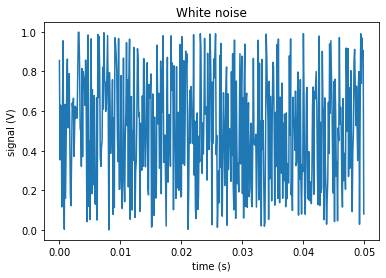

In [1]:
# White noise generation

from pylab import *

WINDOW_LEN = 3000
N_WINDOWS = 10000
N_SAMPLES = WINDOW_LEN*N_WINDOWS

white_noise = np.random.rand(N_SAMPLES)

fs = 10000 # Sampling frequency
times = np.linspace(0, N_SAMPLES, N_SAMPLES)/fs  # Times (in s)
mask_time = times<0.05

plt.figure()
plt.plot(times[mask_time], white_noise[mask_time])
plt.xlabel('time (s)')
plt.ylabel('signal (V)')
plt.title("White noise")

Text(0.5, 1.0, 'Filtered noise')

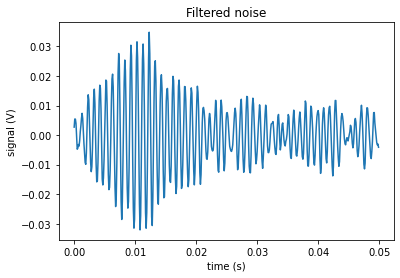

In [2]:
# Filtered noise with a bandpass centered at 1 kHz


from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

signal = butter_bandpass_filter(white_noise, 995, 1005, fs, 1)


plt.figure()

plt.plot(times[mask_time], signal[mask_time])
plt.xlabel('time (s)')
plt.ylabel('signal (V)')
plt.title('Filtered noise')

Text(0.5, 1.0, 'Filtered noise + sine')

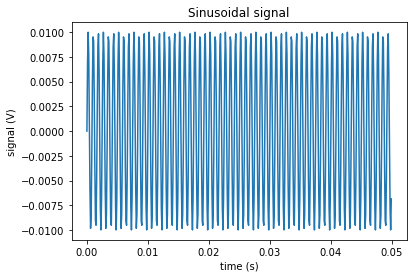

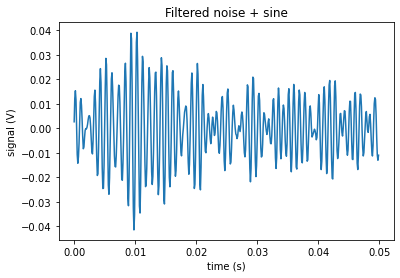

In [3]:
# Add a (True) sinusoidal modulation at 1.2 kHz


f_sinus = 1200
AMPLITUDE_SINUS = 0.01


sinus = AMPLITUDE_SINUS * sin(f_sinus*2*pi*times)

plt.figure()
plt.plot(times[mask_time], sinus[mask_time])
plt.xlabel('time (s)')
plt.ylabel('signal (V)')
plt.title('Sinusoidal signal')
plt.savefig('sine.png')


signal+= sinus

plt.figure()
plt.plot(times[mask_time], signal[mask_time])
plt.xlabel('time (s)')
plt.ylabel('signal (V)')
plt.title('Filtered noise + sine')



## Spectrum estimation using periodograms

In [4]:
def get_spectrum(data, window_len, n_windows):
    spectrum = np.zeros(10*window_len)
    for i in range(n_windows):
        sig = data[i*window_len:(i+1)*window_len]
        periodogram = np.fft.fft(sig, n=10*window_len)/np.sqrt(window_len)
        spectrum+= np.abs(periodogram)**2
    spectrum/=n_windows

    freqs = np.fft.fftfreq(10*len(sig), 1./fs)
    return freqs, spectrum

## Effect of the RBW (window_len) on the estimated spectrum

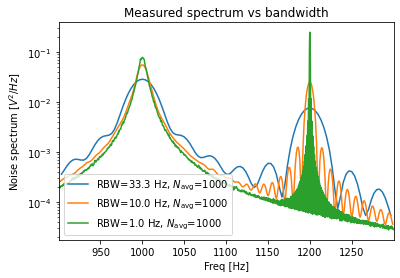

In [5]:
plt.figure()
for window_len in (300, 1000, 10000):
    freqs, spectrum = get_spectrum(signal, window_len, 1000)
    mask = (freqs>900) * (freqs<1300)
    plt.semilogy(freqs[mask], spectrum[mask], label='RBW=%.1f Hz, $N_\mathrm{avg}$=%i'%(fs/window_len, 1000))
plt.xlabel('Freq [Hz]')
plt.ylabel(r'Noise spectrum [$V^2/Hz$]')
plt.xlim(min(freqs[mask]), max(freqs[mask]))

plt.legend(loc='lower left')
plt.title('Measured spectrum vs bandwidth')
plt.savefig('spectrum_vs_rbw.png')

#%%

## Effect of the Video Bandwidth (n_windows) on the estimated spectrum

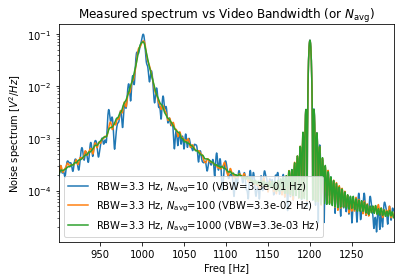

In [21]:
plt.figure()
for n_windows in (10, 100, 1000):
    freqs, spectrum = get_spectrum(signal, WINDOW_LEN, n_windows)
    mask = (freqs>900) * (freqs<1300)

    plt.semilogy(freqs[mask], spectrum[mask], label='RBW=%.1f Hz, $N_\mathrm{avg}$=%i (VBW=%.1e Hz)'%(fs/WINDOW_LEN, n_windows, fs/(WINDOW_LEN*n_windows)))
plt.xlabel('Freq [Hz]')
plt.ylabel(r'Noise spectrum [$V^2/Hz$]')

plt.xlim(min(freqs[mask]), max(freqs[mask]))
plt.title('Measured spectrum vs Video Bandwidth (or $N_\mathrm{avg}$)')
plt.legend(loc='lower left')
plt.savefig('spectrum_vs_videobw.png')